# 2017 장애인 실태조사 지체장애 및 뇌병변장애 건강관리 운동 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 원본 데이터 불러오기
raw_df = pd.read_excel('pydata/2017 장애인실태조사_뇌병변장애.xlsx', sheet_name = 1)
len(raw_df)

# 뇌병변 중 뇌졸중과 뇌손상 불러오기
df = raw_df[(raw_df['주된 진단명(1)']==2) | (raw_df['주된 진단명(1)']==3)]
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
15,2,2,1,21,3.0,1.0,2,5.0,NaN,2,...,0,0,0,0,0,0,0,8,493.318225,1.256747
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970


## 최근 1년 동안 건강관리를 위한 운동한 경험
### 뇌졸중(뇌경색, 뇌출혈)
#### 운동 여부

In [10]:
df.loc[df['주된 진단명(1)'] == 2][['건강관리운동']].value_counts()

건강관리운동
1         260
2         216
dtype: int64

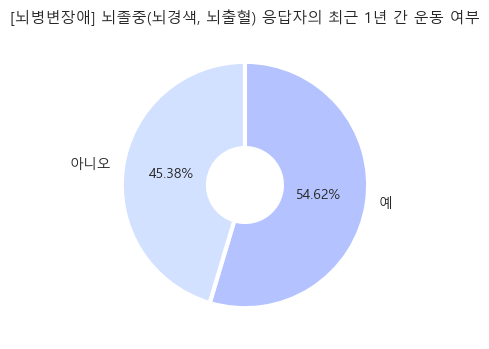

In [241]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [260, 216]
labels=['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 최근 1년 간 운동 여부', size=11)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 최근 1년 간 운동 여부.png", dpi=300)
plt.show()

#### 운동주기

In [59]:
df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 주기']].value_counts()

운동 주기
1        190
2         42
3         15
4          8
6          3
5          2
dtype: int64

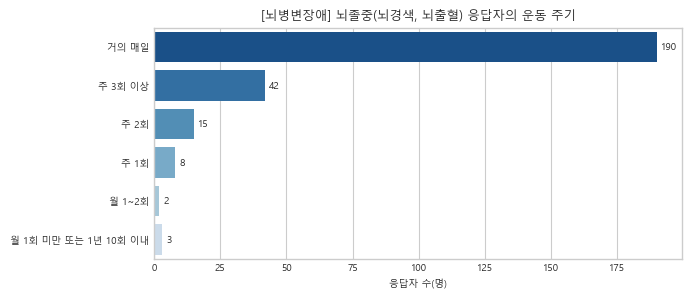

In [236]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 3)

palette = sns.color_palette("Blues", n_colors=7) 
palette.reverse()

splot = sns.countplot(data=df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 주기']], y='운동 주기', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.yticks([0,1,2,3,4,5], ['거의 매일', '주 3회 이상', '주 2회', '주 1회', '월 1~2회', '월 1회 미만 또는 1년 10회 이내'])
plt.ylabel('')
plt.xlabel('응답자 수(명)', size = 7)
plt.xticks(size = 7)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 주기', size=9)
plt.gcf().subplots_adjust(left=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 주기.png", dpi=300)
plt.show()

#### 운동 시간(분)

In [86]:
df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']].describe()

,운동 시간(분)
count,260.000000
mean,51.538462
std,37.278800
min,5.000000
25%,30.000000
50%,40.000000
75%,60.000000
max,240.000000


In [94]:
df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']].value_counts()

운동 시간(분)
30          89
60          69
40          24
20          23
120         21
10          11
90           9
180          5
50           3
240          2
5            1
45           1
70           1
80           1
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


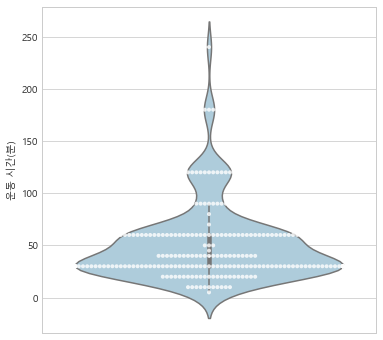

In [30]:
# plt.figure(figsize=(6, 6))

# sns.violinplot(data = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']],
#               y='운동 시간(분)', palette='Paired')
# sns.swarmplot(data = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']],
#               y='운동 시간(분)', color="white", alpha=0.8, size=4)
# plt.title()
# plt.show()

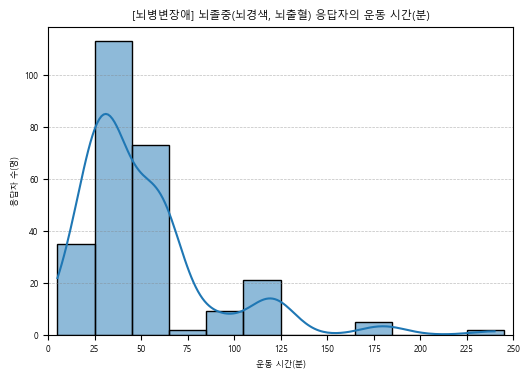

In [145]:
plt.figure(figsize=(6, 4))
plt.style.use('default')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

sns.histplot(data = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 시간(분)']],binwidth= 20, kde=True,
              x='운동 시간(분)', palette='Paired')
plt.ylabel('응답자 수(명)', size = 6)
plt.xticks(np.arange(0, 260, 25)) # x축 눈금 설정
plt.xlabel('운동 시간(분)', size=6)
plt.xlim([0, 250])
plt.xticks(size = 6)
plt.yticks(size = 6)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--', linewidth=0.5)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 시간(분)', size = 8)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 시간(분).png", dpi=300)
plt.show()

#### 운동장소

In [216]:
place_df = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강관리운동']==1][['운동 장소 (1순위)', '운동 장소 (2순위)']]
place_df.head()

,운동 장소 (1순위),운동 장소 (2순위)
13,2,1
42,6,0
85,1,0
118,2,1
133,2,0


In [206]:
place_df1 = pd.DataFrame(place_df[['운동 장소 (1순위)']].value_counts()).reset_index()

new_place = []
place_list = ['집안', '근처 야외 등산로나 공원', '복지관 체육시설', '상업 스포츠 시설', '근처 학교 운동장', '공공체육시설(학교 포함)', '장애인 전용 체육센터','기타']
for i in range(len(place_df1)):
    place_df1.replace({'운동 장소 (1순위)': i+1}, {'운동 장소 (1순위)': place_list[i]}, inplace=True)
place_df1

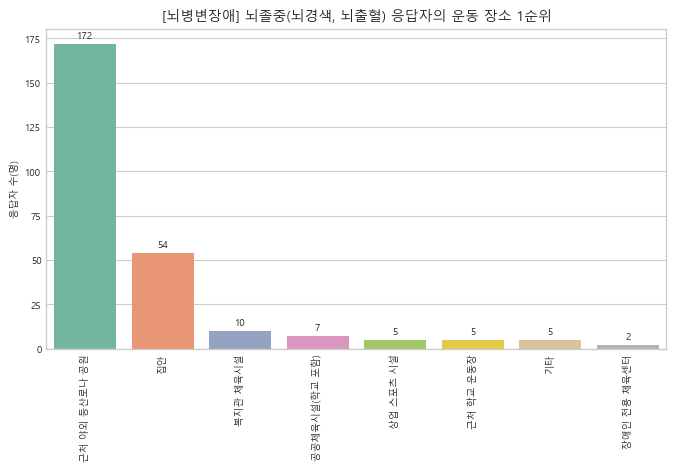

In [215]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

order_list = place_df1['운동 장소 (1순위)'].tolist()

palette = sns.color_palette("Blues", n_colors=8) 
palette.reverse()

splot = sns.barplot(data=place_df1, 
                    x='운동 장소 (1순위)', y = 0, order = order_list, palette='Set2')

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('응답자 수(명)', size = 7)
plt.xticks(size = 7, rotation=90)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 1순위', size=10)
plt.gcf().subplots_adjust(bottom=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 1순위.png", dpi=300)
plt.show()

In [230]:
place_df2 = pd.DataFrame(place_df[['운동 장소 (2순위)']].value_counts()).reset_index()

# new_place = []
place_list = ['비해당', '집안', '근처 야외 등산로나 공원', '복지관 체육시설', '상업 스포츠 시설', '근처 학교 운동장', '공공체육시설(학교 포함)', '장애인 전용 체육센터','기타']
for i in range(len(place_df2)):
    place_df2.replace({'운동 장소 (2순위)': i}, {'운동 장소 (2순위)': place_list[i]}, inplace=True)
place_df2

,운동 장소 (2순위),0
0,비해당,177
1,집안,40
2,근처 야외 등산로나 공원,26
3,근처 학교 운동장,11
4,복지관 체육시설,2
5,공공체육시설(학교 포함),2
6,상업 스포츠 시설,1
7,장애인 전용 체육센터,1


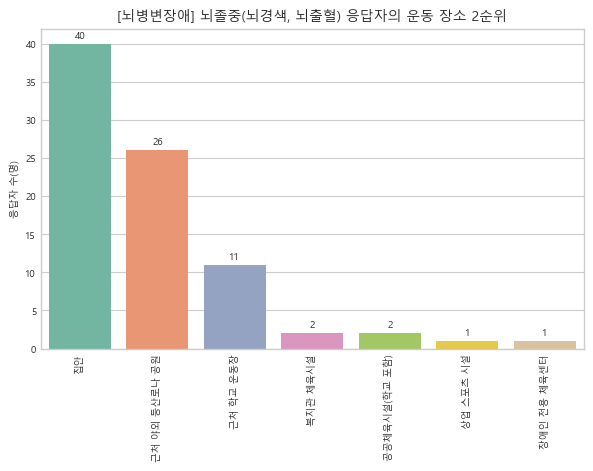

In [235]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

order_list2 = place_df2['운동 장소 (2순위)'].tolist()

palette = sns.color_palette("Blues", n_colors=8) 
palette.reverse()

splot = sns.barplot(data=place_df2.loc[1:, :], 
                    x='운동 장소 (2순위)', y = 0, order = order_list2[1:], palette='Set2')

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('응답자 수(명)', size = 7)
plt.xticks(size = 7, rotation=90)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 2순위', size=10)
plt.gcf().subplots_adjust(bottom=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 2순위.png", dpi=300)
plt.show()

### 뇌손상
#### 운동 여부

In [237]:
df.loc[df['주된 진단명(1)'] == 3][['건강관리운동']].value_counts()

건강관리운동
2         43
1         35
dtype: int64

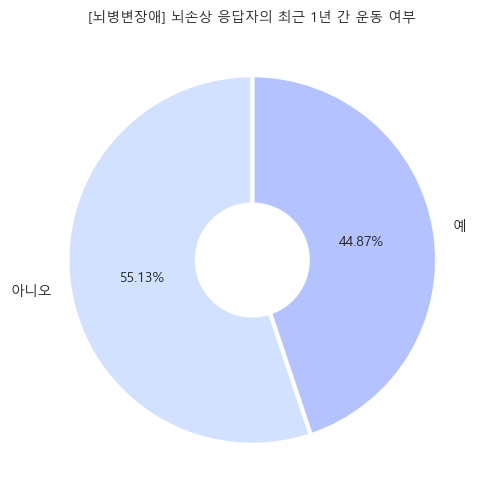

In [244]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [35, 43]
labels=['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[뇌병변장애] 뇌손상 응답자의 최근 1년 간 운동 여부', size=10)

plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 최근 1년 간 운동 여부.png", dpi=300)
plt.show()

#### 운동주기

In [245]:
df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 주기']].value_counts()

운동 주기
1        20
2         9
3         4
4         1
6         1
dtype: int64

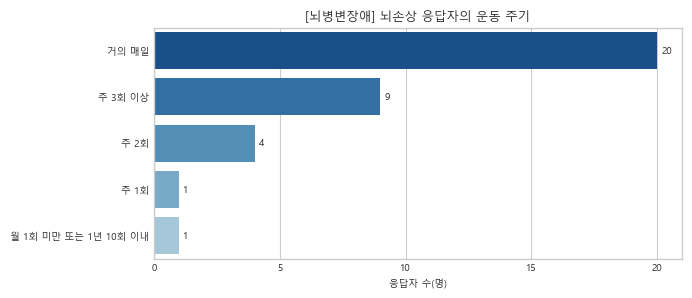

In [252]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 3)

palette = sns.color_palette("Blues", n_colors=7) 
palette.reverse()

splot = sns.countplot(data=df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 주기']], y='운동 주기', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.yticks([0,1,2,3,4], ['거의 매일', '주 3회 이상', '주 2회', '주 1회', '월 1회 미만 또는 1년 10회 이내'])
plt.ylabel('')
plt.xticks(np.arange(0, 25, 5)) # x축 눈금 설정
plt.xlabel('응답자 수(명)', size = 7)
plt.xticks(size = 7)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌손상 응답자의 운동 주기', size=9)
plt.gcf().subplots_adjust(left=0.24)

plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 운동 주기.png", dpi=300)
plt.show()

#### 운동 시간(분)

In [253]:
df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 시간(분)']].describe()

,운동 시간(분)
count,35.000000
mean,62.714286
std,70.140016
min,20.000000
25%,30.000000
50%,40.000000
75%,60.000000
max,420.000000


In [254]:
df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 시간(분)']].value_counts()

운동 시간(분)
30          12
60           8
120          5
20           4
50           2
25           1
40           1
90           1
420          1
dtype: int64

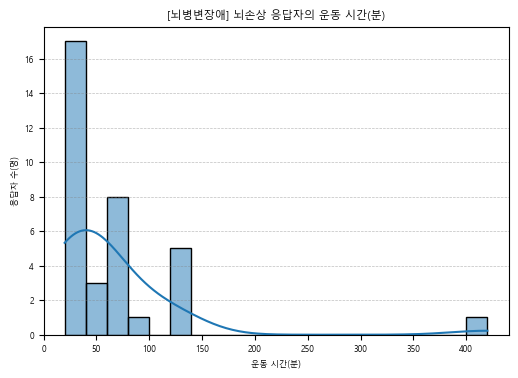

In [258]:
plt.figure(figsize=(6, 4))
plt.style.use('default')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

sns.histplot(data = df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 시간(분)']],binwidth= 20, kde=True,
              x='운동 시간(분)', palette='Paired')
plt.ylabel('응답자 수(명)', size = 6)
# plt.xticks(np.arange(0, 260, 25)) # x축 눈금 설정
plt.xlabel('운동 시간(분)', size=6)
# plt.xlim([0, 250])
plt.xticks(size = 6)
plt.yticks(size = 6)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--', linewidth=0.5)
plt.title('[뇌병변장애] 뇌손상 응답자의 운동 시간(분)', size = 8)

plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 운동 시간(분).png", dpi=300)
plt.show()

#### 운동장소

In [261]:
place_df = df.loc[df['주된 진단명(1)'] == 3].loc[df['건강관리운동']==1][['운동 장소 (1순위)', '운동 장소 (2순위)']]
place_df.head()

,운동 장소 (1순위),운동 장소 (2순위)
335,1,0
887,2,1
922,2,1
1201,2,0
1687,3,2


In [206]:
place_df1 = pd.DataFrame(place_df[['운동 장소 (1순위)']].value_counts()).reset_index()

new_place = []
place_list = ['집안', '근처 야외 등산로나 공원', '복지관 체육시설', '상업 스포츠 시설', '근처 학교 운동장', '공공체육시설(학교 포함)', '장애인 전용 체육센터','기타']
for i in range(len(place_df1)):
    place_df1.replace({'운동 장소 (1순위)': i+1}, {'운동 장소 (1순위)': place_list[i]}, inplace=True)
place_df1

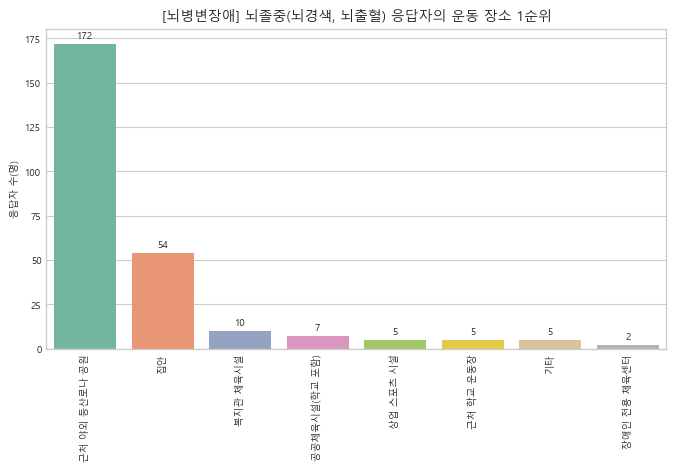

In [215]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

order_list = place_df1['운동 장소 (1순위)'].tolist()

palette = sns.color_palette("Blues", n_colors=8) 
palette.reverse()

splot = sns.barplot(data=place_df1, 
                    x='운동 장소 (1순위)', y = 0, order = order_list, palette='Set2')

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('응답자 수(명)', size = 7)
plt.xticks(size = 7, rotation=90)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 1순위', size=10)
plt.gcf().subplots_adjust(bottom=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 1순위.png", dpi=300)
plt.show()

In [230]:
place_df2 = pd.DataFrame(place_df[['운동 장소 (2순위)']].value_counts()).reset_index()

# new_place = []
place_list = ['비해당', '집안', '근처 야외 등산로나 공원', '복지관 체육시설', '상업 스포츠 시설', '근처 학교 운동장', '공공체육시설(학교 포함)', '장애인 전용 체육센터','기타']
for i in range(len(place_df2)):
    place_df2.replace({'운동 장소 (2순위)': i}, {'운동 장소 (2순위)': place_list[i]}, inplace=True)
place_df2

,운동 장소 (2순위),0
0,비해당,177
1,집안,40
2,근처 야외 등산로나 공원,26
3,근처 학교 운동장,11
4,복지관 체육시설,2
5,공공체육시설(학교 포함),2
6,상업 스포츠 시설,1
7,장애인 전용 체육센터,1


,운동 장소 (2순위),0
1,집안,40
2,근처 야외 등산로나 공원,26
3,근처 학교 운동장,11
4,복지관 체육시설,2
5,공공체육시설(학교 포함),2
6,상업 스포츠 시설,1
7,장애인 전용 체육센터,1


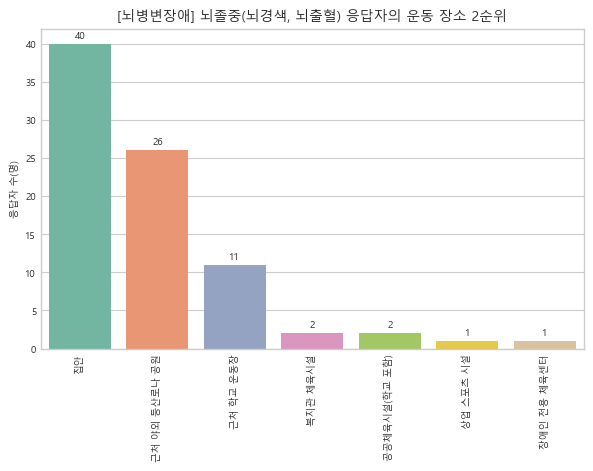

In [235]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 5)
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

order_list2 = place_df2['운동 장소 (2순위)'].tolist()

palette = sns.color_palette("Blues", n_colors=8) 
palette.reverse()

splot = sns.barplot(data=place_df2.loc[1:, :], 
                    x='운동 장소 (2순위)', y = 0, order = order_list2[1:], palette='Set2')

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel('')
plt.ylabel('응답자 수(명)', size = 7)
plt.xticks(size = 7, rotation=90)
plt.yticks(size = 7)
plt.title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 2순위', size=10)
plt.gcf().subplots_adjust(bottom=0.24)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 운동 장소 2순위.png", dpi=300)
plt.show()